In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import datetime

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the data from a CSV file
path = '../data/BitCoin.csv'

df = pd.read_csv(path)
print(df.head())
print(df.dtypes)


   Unnamed: 0        Date     Open     High      Low    Close        Volume  \
0           0  2017-09-22  3628.02  3758.27  3553.53  3630.70  1.194830e+09   
1           1  2017-09-21  3901.47  3916.42  3613.63  3631.04  1.411480e+09   
2           2  2017-09-20  3916.36  4031.39  3857.73  3905.95  1.213830e+09   
3           3  2017-09-19  4073.79  4094.07  3868.87  3924.97  1.563980e+09   
4           4  2017-09-18  3591.09  4079.23  3591.09  4065.20  1.943210e+09   

    Market Cap  
0  60152300000  
1  64677600000  
2  64918500000  
3  67520300000  
4  59514100000  
Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object


In [3]:
#  Dropping unnessacery columns 
df.drop( columns='Unnamed: 0', inplace=True)
# df.head()


In [4]:
# # Log-Transforming the ata
df['log_open'] = np.log(df['Open'])
df['log_high'] = np.log(df['High'])
df['log_low'] = np.log(df['Low'])
df['log_close'] = np.log(df['Close'])
df['log_volume'] = np.log(df['Volume'])

# df.head()

In [5]:
# Checking correlation

# df1 = df.drop(columns='Date')

# corr_matrix = np.zeros((7, 7))
# for i in range(7):
#     for j in range(i+1, 7):
#         corr, _ = pearsonr(df1.iloc[:, i], df.iloc[:, j])
#         corr_matrix[i, j] = corr
#         corr_matrix[j, i] = corr

# print(corr_matrix)

In [6]:
# Scaling the data
scaler = StandardScaler()
df2 = df.copy()
df2 = df.drop(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume'])
df_scaled = scaler.fit_transform(df2)

In [7]:
# Saving Prepared Data
# df2.to_csv('../data/prepared_data.csv', index=False)

In [8]:
X = df_scaled[:, :-1]  # features
y = df_scaled[:, -1]  # target variable - Market Cap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Create a baseline model
y_pred_baseline = np.mean(y_train)
y_pred_baseline

-0.014955837044865328

In [11]:
# Declaring and fitting the Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [13]:
# Cross-Validation
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_train)

scores = cross_val_score(model, X_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", np.mean(scores))

Cross-Validation Scores: [-0.18965572 -0.18382833 -0.22392036 -0.21682425 -0.19696379]
Mean Cross-Validation Score: -0.20223848975745326


In [14]:
# Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the model
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best Parameters: {'copy_X': True, 'fit_intercept': False}
Best Score: -0.20202112604839934
Mean Squared Error: 0.22985796052808757


In [15]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmspe = np.sqrt(np.mean((y_test - y_pred) ** 2) / np.mean(y_test ** 2))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f"Root Mean Squared Percentage Error: {rmspe:.2f}")
print(f'Coefficient of Determination: {r2}')

Mean Squared Error: 0.22985796052808757
Mean Absolute Error: 0.3822753515364923
Mean Absolute Percentage Error: 1.797306056045319
Root Mean Squared Percentage Error: 0.48
Coefficient of Determination: 0.7668067663256191


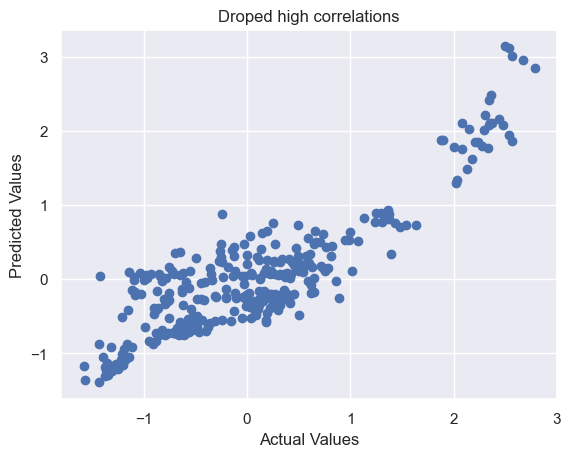

In [16]:
# Visualizing the prediction
sns.set()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Droped high correlations')
plt.show()

In [17]:
# Saving the model
# import joblib

# joblib.dump(model, '../artifacts/model.sav')

['../artifacts/model.sav']